In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [55]:
import requests
import io

In [6]:
bio = pd.read_csv("BIO.csv")
ce = pd.read_csv("CE.csv")
hca = pd.read_csv("HCA.csv")
mlm = pd.read_csv("MLM.csv")
oke = pd.read_csv("OKE.csv")

companies = {"bio" : bio, "ce" : ce, "hca" : hca, "mlm" : mlm, "oke" : oke}

for df in companies.values():
    df["Date"] = pd.to_datetime(df["Date"])
    print(df.Date.dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


Is there a company that has no difference between the High and Low columns?
What does it mean for the stock's trading behavior on such days?

In [ ]:
for firm, df in companies.items():
    if all(df["High"] == df["Low"]):
        print(f"There is no difference for {firm} between high and low.")
    else: 
        print(f"There is a difference for {firm} between high and low.")

#For all of these companies there is a difference between the high and low prices on all the days. This means that stocks were changing their price on all the days.

There is a difference
There is a difference
There is a difference
There is a difference
There is a difference


What is the highest and lowest price (High) each company recorded?

In [13]:
for firm, df in companies.items():
    print(f"the highest High price for company {firm} is {df["High"].max()}")
    print(f"the lowest High price for company {firm} is {df["High"].min()}")


the highest High price for company bio is 832.7
the lowest High price for company bio is 184.81
the highest High price for company ce is 165.139
the lowest High price for company ce is 58.823
the highest High price for company hca is 272.703
the lowest High price for company hca is 70.126
the highest High price for company mlm is 438.546
the lowest High price for company mlm is 149.177
the highest High price for company oke is 64.51
the lowest High price for company oke is 14.498


Calculate logarithmic returns from Close. For each company report on its, min, max, mean, standard deviation, and skewness of the return distribution.

In [20]:
for firm, df in companies.items():
    df["LogReturns"] = np.log(df["Close"]) - np.log(df["Close"].shift(1))
    print(f"{firm} has the min Log Return is {df['LogReturns'].min()}")
    print(f"{firm} has the max Log Return is {df['LogReturns'].max()}")
    print(f"{firm} has the mean Log Return is {df['LogReturns'].mean()}")
    print(f"{firm} has the median Log Return is {df['LogReturns'].median()}")
    print(f"{firm} has the skewness Log Return is {df['LogReturns'].skew()}")
    print(f"{firm} has the standard deviation Log Return is {df['LogReturns'].std()}")

bio has the min Log Return is -0.10388518829468119
bio has the max Log Return is 0.186507491745334
bio has the mean Log Return is 0.0005516411327564934
bio has the median Log Return is 0.0009382121047414316
bio has the skewness Log Return is 0.6408386435642303
bio has the standard deviation Log Return is 0.020402441368023837
ce has the min Log Return is -0.17504811195843484
ce has the max Log Return is 0.12810711631084182
ce has the mean Log Return is 0.0002503296400097376
ce has the median Log Return is 0.000654535957391289
ce has the skewness Log Return is -0.8227887495096242
ce has the standard deviation Log Return is 0.021373362412228543
hca has the min Log Return is -0.246196213884474
hca has the max Log Return is 0.2034219796101624
hca has the mean Log Return is 0.0008077444470560631
hca has the median Log Return is 0.0007447807508134119
hca has the skewness Log Return is -0.7406575169733131
hca has the standard deviation Log Return is 0.023068046725384924
mlm has the min Log Ret

When did each company record the second highest gain and second highest
loss for the day? (logarithmic loss). Hint: idxmax

In [ ]:
for firm, df in companies.items():

    df["find_2gain"] = np.sign(df["LogReturns"] - df["LogReturns"].max())*df["LogReturns"] #-1 for everyone, 0 for max; max becomes 0 the rest flips and now the second biggest is smallest
    second_gain = df.loc[df["find_2gain"] == df["find_2gain"].min(), 'Date']
    print(f"2nd highest gain for {firm} was on {second_gain[second_gain.index[0]]}")

    df["find_2loss"] = np.sign(df["LogReturns"] - df["LogReturns"].min())*df["LogReturns"] #1 for everyone, 0 for min; min becomes 0 the rest stays the same, this might not be good if there is no loss since 0 would be lowest but I do not think that happened
    second_loss = df.loc[df["find_2loss"] == df["find_2loss"].min(), 'Date']
    print(f"2nd highest loss for {firm} was on {second_loss[second_loss.index[0]]}")

    

2nd highest gain for bio was on 2019-03-01 00:00:00
2nd highest loss for bio was on 2022-10-10 00:00:00
2nd highest gain for ce was on 2020-05-18 00:00:00
2nd highest loss for ce was on 2020-03-16 00:00:00
2nd highest gain for hca was on 2021-07-20 00:00:00
2nd highest loss for hca was on 2020-03-16 00:00:00
2nd highest gain for mlm was on 2020-03-19 00:00:00
2nd highest loss for mlm was on 2020-03-18 00:00:00
2nd highest gain for oke was on 2020-11-09 00:00:00
2nd highest loss for oke was on 2020-03-18 00:00:00


What is the median calendar weekly volume for each company? Hint: check how
to resample pandas DF

In [32]:
for firm, df in companies.items():
    medianweeklyvol = df["Volume"].rolling(7).sum().median()
    print(f"the median calendar weekly volume for {firm} was {medianweeklyvol}")

the median calendar weekly volume for bio was 1250450.0
the median calendar weekly volume for ce was 6070400.0
the median calendar weekly volume for hca was 11784150.0
the median calendar weekly volume for mlm was 3768950.0
the median calendar weekly volume for oke was 18177200.0


Which company recorded the lowest total return over the whole period?

In [ ]:

totalretrn = {}
for firm, df in companies.items():
    df["cumsum"] = df["Close"].cumsum()
    first = df["cumsum"].iloc[0]
    last = df["cumsum"].iloc[-1]
    totalret = last - first
    totalretrn[firm] = totalret


tr = pd.DataFrame(totalretrn, index=["totalreturn"]).T
print(tr)
print(tr.min())


#it was oke

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2130298129.py, line 15)

Create a new column volume_class based on the volume column into
categories (e.g., "Low", "Medium", "High") and use tertile thresholds for the
classes.

A. Plot the log-returns of the companies (ideally in the same plot).
B. Show the log-return distribution of the companies (ideally in the same plot).

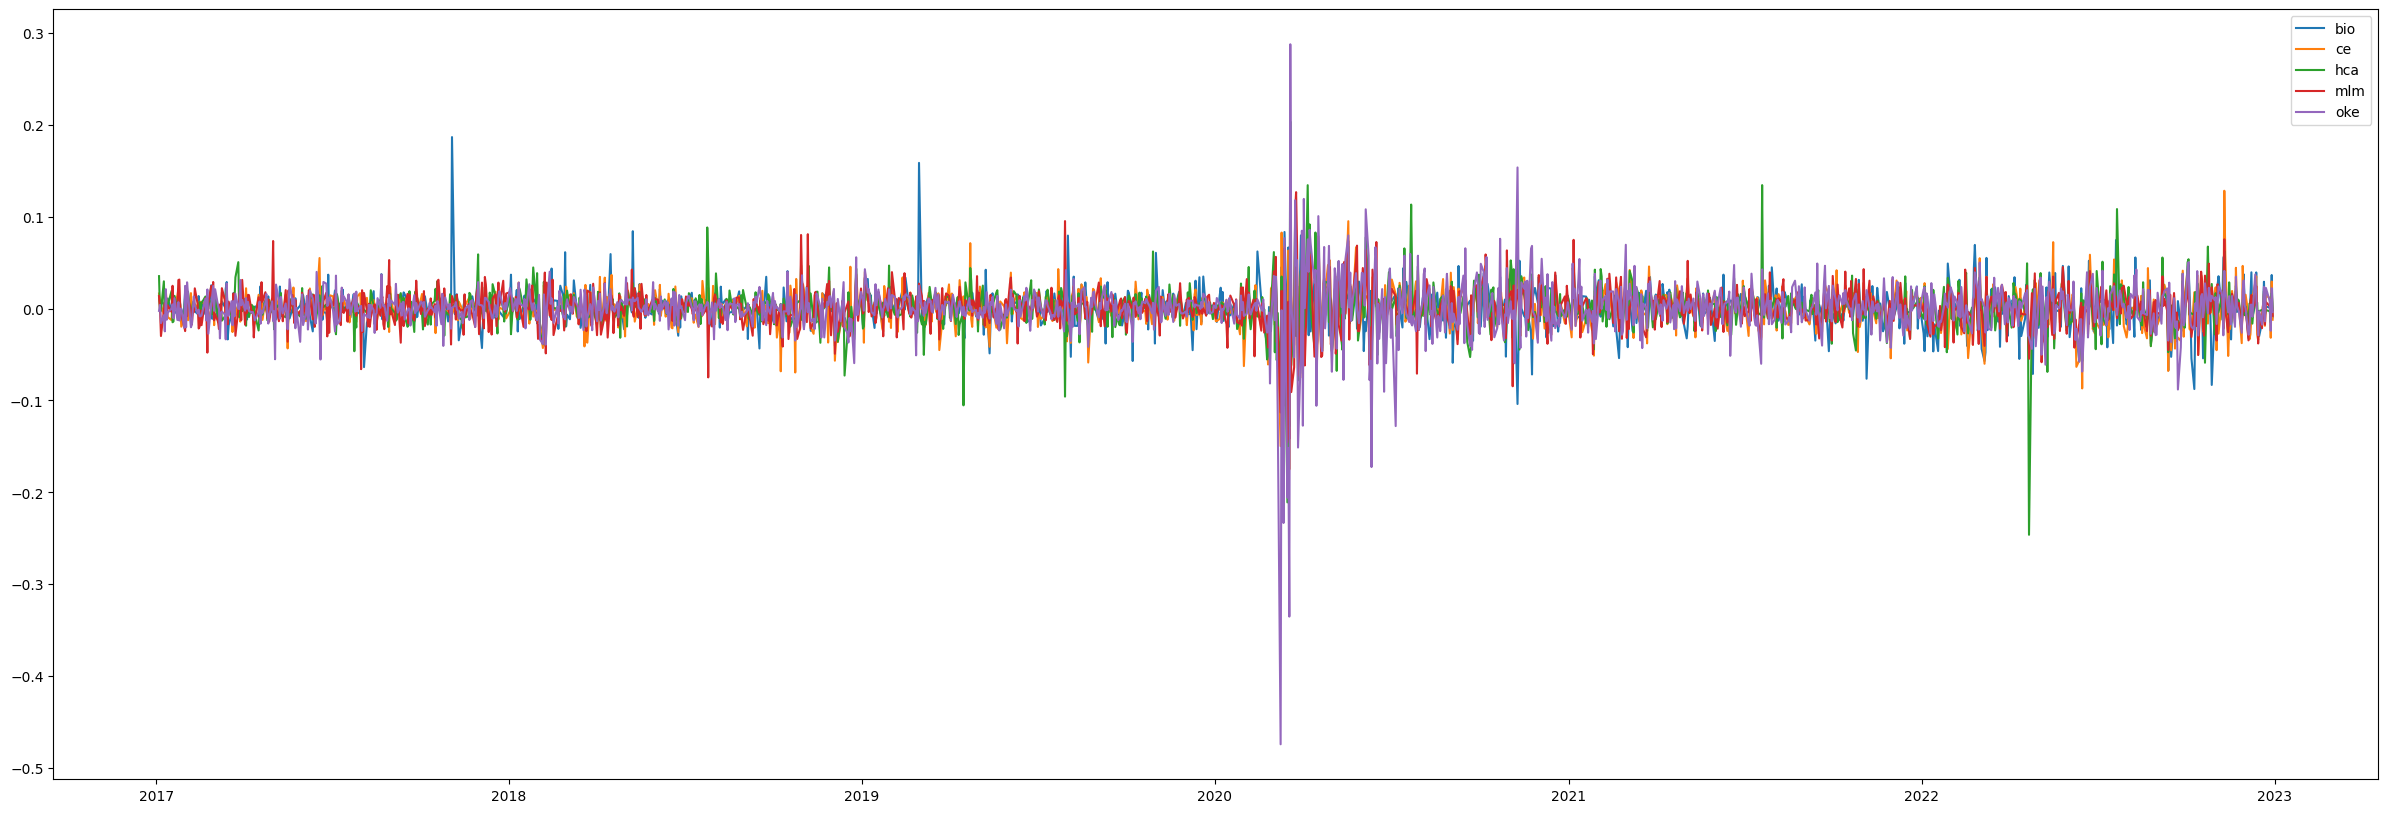

In [45]:
plt.subplots(1,1, figsize = (30,10))
for firm, df in companies.items():
    plt.plot(df["Date"],df["LogReturns"], label = firm)
plt.legend()

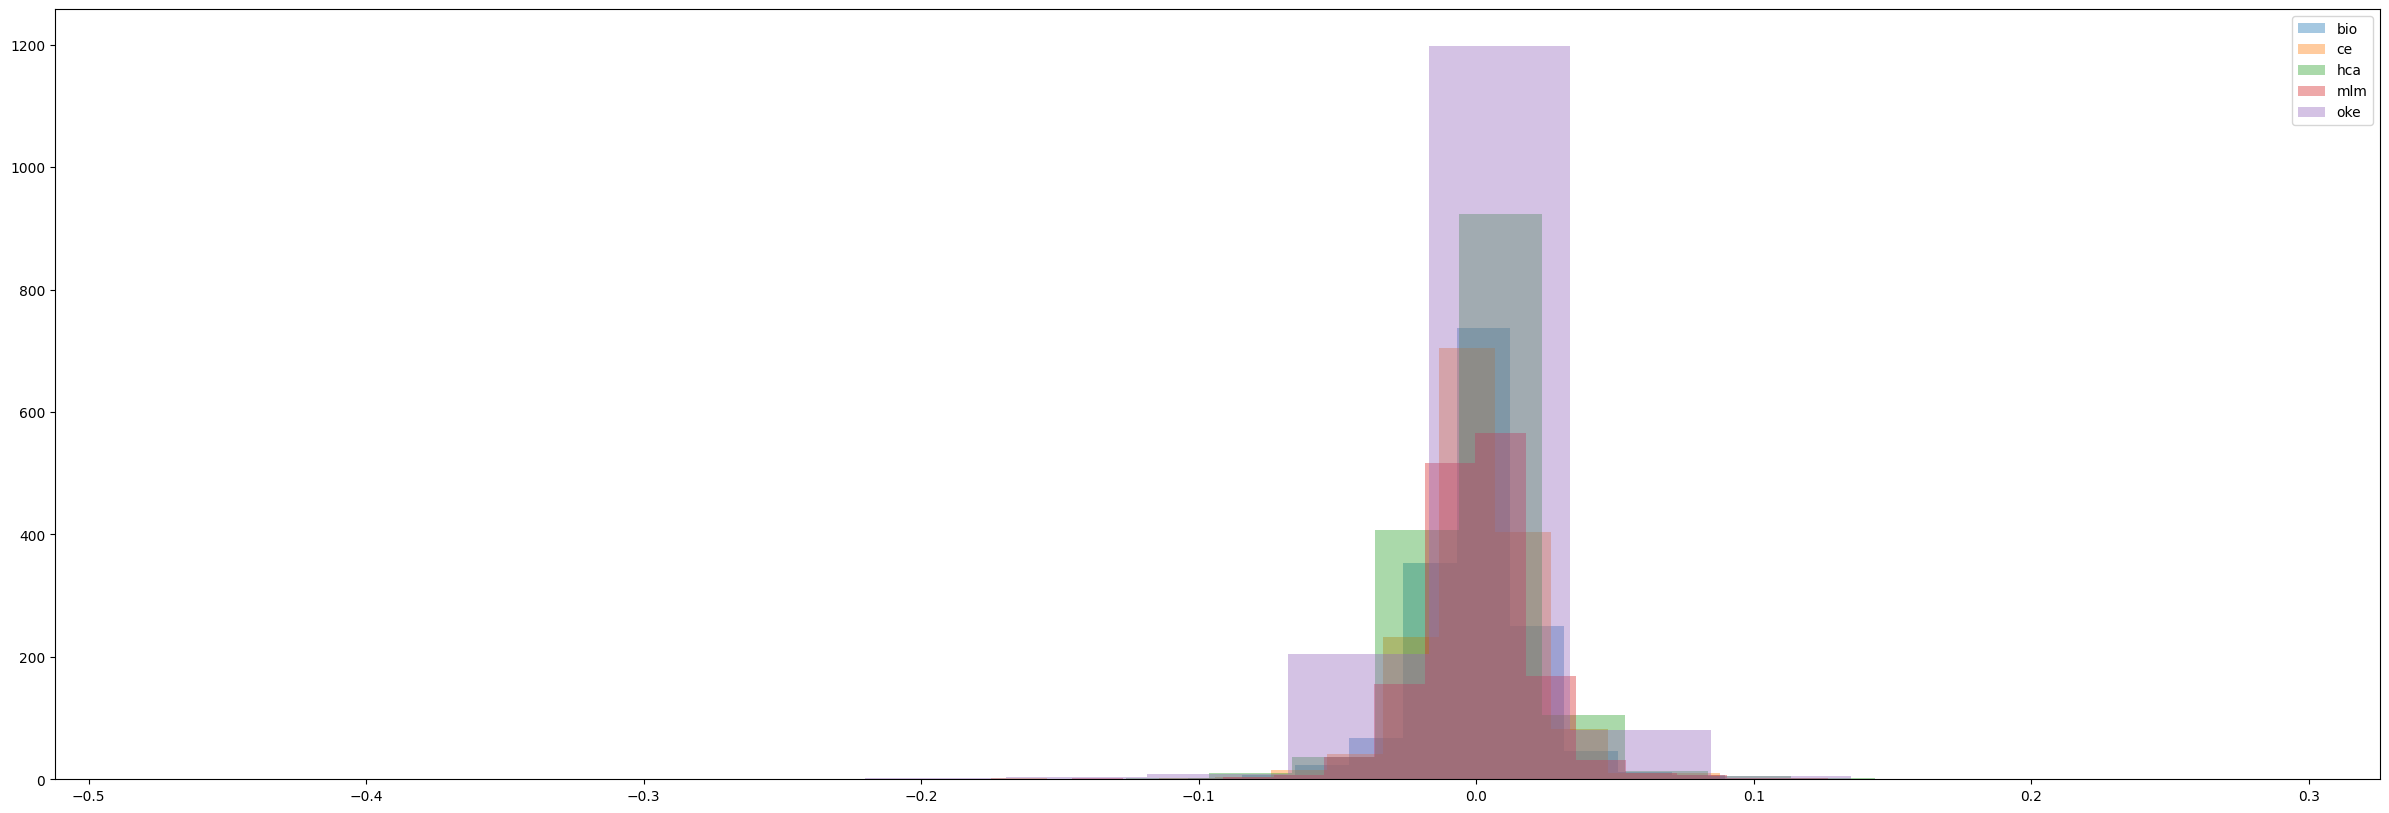

In [47]:
plt.subplots(1,1, figsize = (30,10))
for firm, df in companies.items():
    plt.hist(df["LogReturns"], label = firm, bins= 15, alpha = 0.4)
plt.legend()

PART 2

Find out how many companies do not filled-in the date of inclusion
(column “included”) to S&P 500.

In [52]:
url = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
req = requests.get(url).content
data =pd.read_csv(io.StringIO(req.decode('utf-8')))

In [54]:
notfilled = data["included"].isnull().sum()
print(f"{notfilled} did not fill it in")

45 did not fill it in


Delete the companies with no inclusion date and calculate which company is
the oldest/youngest constituent and tell us the median age of a constituent in
the sample. If you need to fix anything or make any assumptions, comment on
them in the code.

In [80]:
data["Founded"] = pd.to_datetime(data["Founded"], errors="coerce", dayfirst=True)
today = datetime.datetime.today()
year = today.year
oldest = data.loc[data["Founded"] == data["Founded"].min(), "Symbol"]
youngest = data.loc[data["Founded"] == data["Founded"].max(), "Symbol"]
print(f"The oldest company is {oldest.iloc[0]}")
print(f"The youngest company is {youngest.iloc[0]}")
data["age"] = year - data["Founded"].dt.year
average_age = round(data["age"].mean(), 2)
print(f"The average age of companies is {average_age} years")


The oldest company is BK
The youngest company is WBD
The average age of companies is 73.27 years


Describe the distribution of companies across sectors and create a plot that
demonstrates the proportionality of the sectors (i.e. pie plot, or something like
this)

(array([], dtype=float64), [])

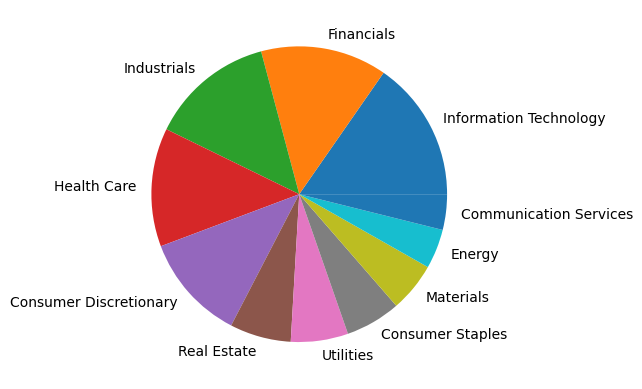

In [74]:
sector = data["GICS_Sector"].value_counts().reset_index()
plt.pie(sector["count"], labels= sector["GICS_Sector"])
plt.xticks()

Parse the “hq” column, extract the state of the hq and describe the distribution
of the states